<a href="https://colab.research.google.com/github/maliksalman55/Thesis/blob/main/Weight_Model_ResNet50_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = '/content/drive/MyDrive/Project/weight.Dataset'

# Split the data into training (80%) and validation (20%) sets
training_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,  # 20% of the data will be used for validation
    subset="training",    # Specify "training" for the training set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.2  # Randomly zoom into images
)
# Validation set (remaining 20%)
validation_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=10,
    image_size=(224, 224),
    shuffle=False,
    seed=42,
    validation_split=0.2,  # 20% of the data will be used for validation
    subset="validation",    # Specify "validation" for the validation set
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
val_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.2  # Randomly zoom into images
)
print("Number of classes in the training set:", len(training_set.class_names))
print("Number of classes in the validation set:", len(validation_set.class_names))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 894 files belonging to 160 classes.
Using 716 files for training.
Found 894 files belonging to 160 classes.
Using 178 files for validation.
Number of classes in the training set: 160
Number of classes in the validation set: 160


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()

# Add the ResNet50 base model
model.add(base_model)

# Add Global Average Pooling layer
model.add(GlobalAveragePooling2D())

# Add a fully connected layer with batch normalization and dropout
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add the output layer (adjust the number of units for your dataset)
model.add(Dense(160, activation='softmax'))

# Optionally, you can freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Implement data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2])

# Compile the model with an Adam optimizer and a learning rate schedule
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                         

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights to the best epoch
)

# Now, we can include the early_stopping callback when fitting your model
training_history = model.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=32,
    callbacks=[early_stopping]  # Include the early_stopping callback
)

Epoch 1/32
23/23 [==============================] - 260s 10s/step - loss: 5.6362 - accuracy: 0.0852 - val_loss: 5.5124 - val_accuracy: 0.0730
Epoch 2/32
23/23 [==============================] - 205s 9s/step - loss: 3.5452 - accuracy: 0.2961 - val_loss: 4.1256 - val_accuracy: 0.2584
Epoch 3/32
23/23 [==============================] - 201s 9s/step - loss: 2.5795 - accuracy: 0.4581 - val_loss: 3.1916 - val_accuracy: 0.3989
Epoch 4/32
23/23 [==============================] - 202s 9s/step - loss: 1.8379 - accuracy: 0.6201 - val_loss: 2.5026 - val_accuracy: 0.5674
Epoch 5/32
23/23 [==============================] - 189s 8s/step - loss: 1.4173 - accuracy: 0.7193 - val_loss: 2.0340 - val_accuracy: 0.6742
Epoch 6/32
23/23 [==============================] - 195s 8s/step - loss: 1.0552 - accuracy: 0.7612 - val_loss: 1.8972 - val_accuracy: 0.6742
Epoch 7/32
23/23 [==============================] - 196s 8s/step - loss: 0.7302 - accuracy: 0.8240 - val_loss: 1.7143 - val_accuracy: 0.7472
Epoch 8/32
2

In [ ]:
# Evaluating Model
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

23/23 [==============================] - 155s 7s/step - loss: 0.3848 - accuracy: 0.9385
Training accuracy: 0.9385474920272827


In [ ]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

18/18 [==============================] - 34s 2s/step - loss: 1.4160 - accuracy: 0.7921
Validation accuracy: 0.7921348214149475


In [ ]:
# Save model
model.save('/content/drive/MyDrive/Project/Models/weight79_model.keras')

In [ ]:
import keras
model = keras.models.load_model('/content/drive/MyDrive/Project/Models/weight79_model.keras')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [ ]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/Project/Models/weight79_model.keras'  # Specify the path to your saved model
loaded_model = tf.keras.models.load_model(saved_model_path)

In [ ]:
# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

In [ ]:

# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 1s 1s/step


In [ ]:
# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  2  0]
 [ 0  0  0 ...  0  0 17]]


In [ ]:
# Generate class names based on the number of unique classes
class_names = [str(i) for i in range(max(max(true_labels), max(predicted_labels)) + 1)]


In [ ]:
# Print a classification report with class names
report = classification_report(true_labels, predicted_labels, labels=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

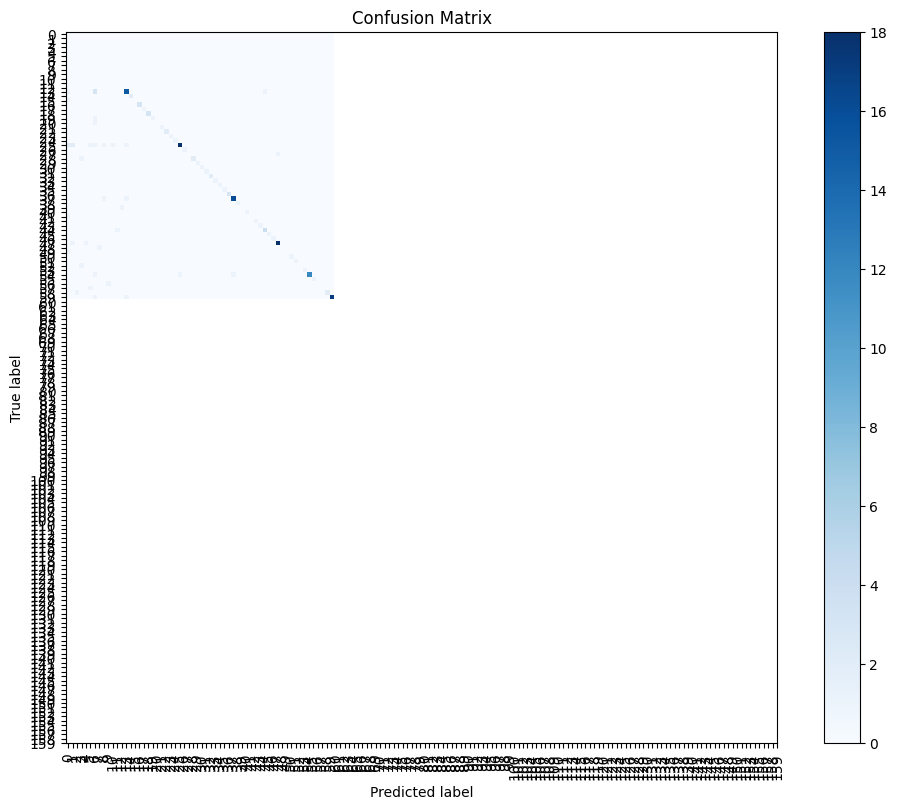

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()